In [ ]:
import PIL
import matplotlib.pyplot as plt
import cv2 as cv
import time
import numpy as np
from scipy import ndimage as nd

# OpenCV Stereovision

In [ ]:
image_L = cv.imread('/content/drive/MyDrive/TDTecher SDP/Images/left_cone.png', 0)
image_R = cv.imread('/content/drive/MyDrive/TDTecher SDP/Images/right_cone.png', 0)

TypeError: ignored

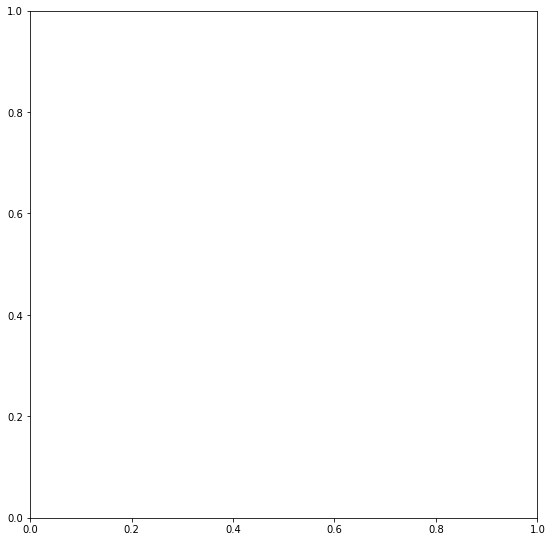

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(image_L)
plt.title('Left Image', fontsize=20)
plt.subplot(122)
plt.imshow(image_R)
plt.title('Right Image', fontsize=20)
plt.tight_layout()

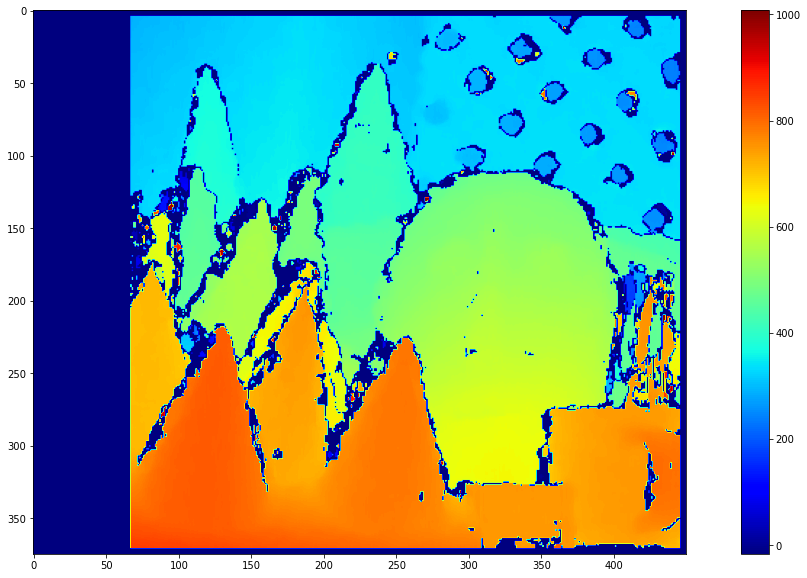

In [ ]:
start = time.time()
stereo = cv.StereoBM_create(numDisparities=64, blockSize=9)
disparity = stereo.compute(image_L, image_R)
end = time.time()

plt.figure(figsize=(20, 10))
plt.imshow(disparity, cmap='jet')
plt.colorbar()

In [ ]:
end -start

0.01896524429321289

# Real-Time Implementation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL
import matplotlib.pyplot as plt
import cv2 as cv
import time
import numpy as np
from scipy import ndimage as nd

In [ ]:
image_L = cv.imread('/content/drive/MyDrive/TDTecher SDP/Images/left_piano.png', 1)
image_L = cv.cvtColor(image_L, cv.COLOR_BGR2RGB)
image_R = cv.imread('/content/drive/MyDrive/TDTecher SDP/Images/right_piano.png', 1)
image_R = cv.cvtColor(image_R, cv.COLOR_BGR2RGB)

image_L_gray = cv.cvtColor(image_L, cv.COLOR_BGR2GRAY) + 1e-3
image_R_gray = cv.cvtColor(image_R, cv.COLOR_BGR2GRAY) + 1e-3

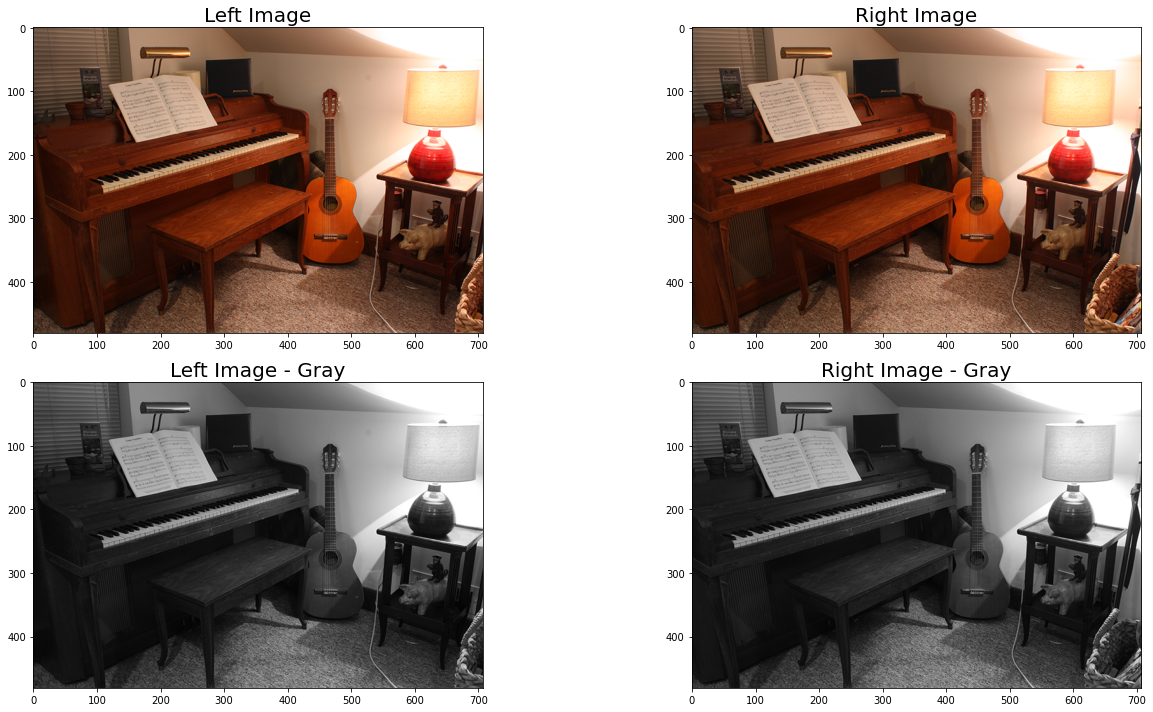

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.imshow(image_L)
plt.title('Left Image', fontsize=20)
plt.subplot(222)
plt.imshow(image_R)
plt.title('Right Image', fontsize=20)
plt.subplot(223)
plt.imshow(image_L_gray, cmap='gray')
plt.title('Left Image - Gray', fontsize=20)
plt.subplot(224)
plt.imshow(image_R_gray, cmap='gray')
plt.title('Right Image - Gray', fontsize=20)
plt.tight_layout()

In [ ]:
def cost_block_matching(image_L_gray, image_R_gray, block_x, block_y, disp):

    column_offset = np.floor(block_x/2).astype(int)
    row_offset = np.floor(block_y/2).astype(int)

    col_bound_L = column_offset + disp
    col_bound_U = image_L_gray.shape[1] - column_offset
    row_bound_L = row_offset
    row_bound_U = image_L_gray.shape[0] - row_offset

    cost = np.empty((row_bound_U-row_bound_L, col_bound_U-col_bound_L, disp))

    L_avg = nd.uniform_filter(image_L_gray, (block_y, block_x), mode='constant')
    R_avg = nd.uniform_filter(image_R_gray, (block_y, block_x), mode='constant')

    for d in range(0, disp):
        for r in range(row_bound_L, row_bound_U):
            for c in range(col_bound_L, col_bound_U):

                L_cost = (image_L_gray[r-row_offset:r+row_offset+1, c-column_offset:c+column_offset+1] - L_avg[r, c])
                R_cost = (image_R_gray[r-row_offset:r+row_offset+1, c-column_offset-d:c+column_offset-d+1] - R_avg[r, c-d])

                cost[r-row_bound_L, c-col_bound_L, d] = np.sum(L_cost*R_cost)/np.sqrt((np.sum(L_cost**2)*np.sum(R_cost**2)))

    return cost, row_bound_U-row_bound_L, col_bound_U-col_bound_L

def multiblock(image_L, image_R, block1_x, block1_y, block2_x, block2_y, block3_x, block3_y, disp):

    block1, row_size_1, col_size_1 = cost_block_matching(image_L_gray, image_R_gray, block1_x, block1_y, disp)
    block2, row_size_2, col_size_2 = cost_block_matching(image_L_gray, image_R_gray, block2_x, block2_y, disp)
    block3, row_size_3, col_size_3 = cost_block_matching(image_L_gray, image_R_gray, block3_x, block3_y, disp)


In [ ]:
R = (image_L_gray.shape[0] - row_size_1 - 4)
R = int(R)
C = (image_L_gray.shape[1] - col_size_1 - 4 - 8)
C = int(C)

In [ ]:
A = np.zeros(np.append(image_L_gray.shape, 3))

In [ ]:
A[R:-R, C:-C, 0] = block1[:, :, 0]

In [ ]:
block1[:, :, 0].shape

(461, 689)

In [ ]:
block1, row_size_1, col_size_1 = cost_block_matching(image_L_gray, image_R_gray, 9, 9, 16)
block2, row_size_2, col_size_2 = cost_block_matching(image_L_gray, image_R_gray, 21, 3, 16)
block3, row_size_3, col_size_3 = cost_block_matching(image_L_gray, image_R_gray, 3, 21, 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
print((row_size_1, col_size_1), (row_size_2, col_size_2), (row_size_3, col_size_3))
min(row_size_1, row_size_2, row_size_3)

(473, 683) (479, 671) (461, 689)


461

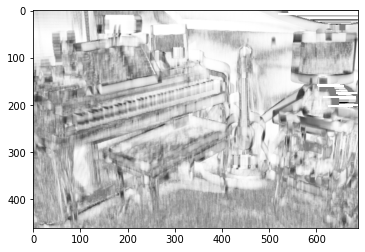

In [ ]:
plt.imshow(np.amax(block3, 2), cmap='gray')

In [ ]:
image_L_gray.shape[0] - row_offset - row_offset, image_L_gray.shape[1] - column_offset - (column_offset + disp)

(479, 671)

In [ ]:
image_R_gray[r-row_offset-d:r+row_offset+1-d, c-column_offset:c+column_offset+1]

array([], shape=(0, 21), dtype=uint8)

In [ ]:
block_x = 21
block_y = 3
disp = 16

cost = np.empty((image_L_gray.shape[0], image_L_gray.shape[1], disp))

L_avg = nd.uniform_filter(image_L_gray, (block_y, block_x), mode='constant')
R_avg = nd.uniform_filter(image_R_gray, (block_y, block_x), mode='constant')

for d in range(0, disp):

    cost[disp:-disp, :, d] = (image_L_gray[disp:-disp, :] - L_avg[disp:-disp, :])*(image_R_gray[disp-d:-disp-d, :] - R_avg[disp-d:-disp-d, :])

In [ ]:
cost[disp:-disp, :, 5]

array([[160.,   0.,   0., ...,   0.,   0.,  57.],
       [238.,   0.,   0., ...,   0.,   0.,  57.],
       [ 64.,   1.,   0., ...,   0.,   0.,  57.],
       ...,
       [ 96., 250.,   4., ..., 232.,   8., 240.],
       [ 55.,   4.,   7., ...,  30., 136.,  48.],
       [ 80.,  20.,   3., ..., 164., 224., 117.]])

In [ ]:
image_L_gray - L_avg

array([[ 48,  45,  44, ..., 150, 158, 166],
       [ 34,  32,  27, ...,  98, 110, 122],
       [ 38,  33,  27, ...,  98, 110, 122],
       ...,
       [ 18,  28,  29, ...,  26,  21,  16],
       [ 16,  13, 255, ...,  16,  18,  10],
       [ 31,  33,   9, ...,   5,  24,  26]], dtype=uint8)

In [ ]:
nd.uniform_filter(a, (5, 1), mode='constant')

array([[0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2]])